In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd

In [126]:
def extract(src):
    df = pd.read_csv(src)
    print(f"Rows: {df.shape[0]},\tColumns: {df.shape[1]}")
    
    df = df.rename(columns=lambda x: x.replace(" ", ""))
    
    df.head(5)
    return df

In [127]:
data = extract("T:/DataSets/diabetes.csv")
data.head()

Rows: 768,	Columns: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Target/Label/Outcome Visualization of No of Diabetes patients 

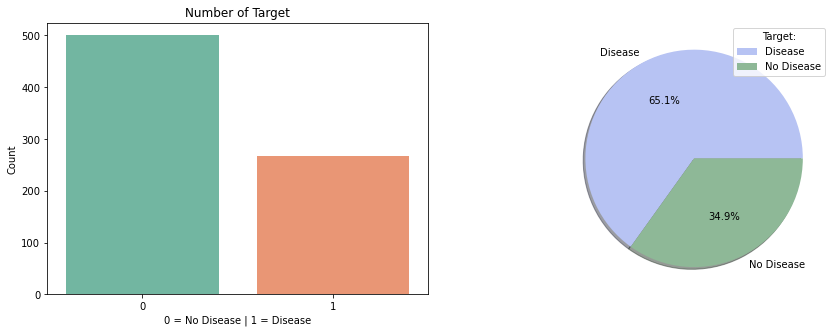

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="Outcome", data=data, palette="Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
target_counts = data['Outcome'].value_counts()
plt.pie(target_counts.values, labels=["Disease", "No Disease"], shadow=True, autopct="%1.1f%%", colors=["#B7C3F3", "#8EB897"])
plt.legend(title="Target:")

plt.show()

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


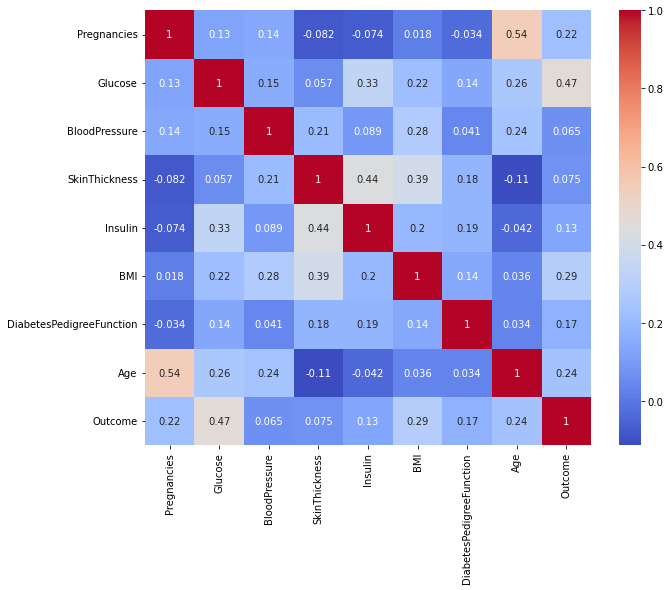

In [131]:
# Get the correlation matrix as a Pandas DataFrame
correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8)) 

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Number of Instances: 768
Number of Attributes: 8 plus target/class 
For Each Attribute: (all numeric-valued)

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [132]:
x=data.drop(['Outcome'],axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [133]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [135]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [136]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
446,1,100,72,12,70,25.3,0.658,28
260,3,191,68,15,130,30.9,0.299,34
570,3,78,70,0,0,32.5,0.270,39
590,11,111,84,40,0,46.8,0.925,45
30,5,109,75,26,0,36.0,0.546,60


In [137]:
ytrain.head()

446    0
260    0
570    0
590    1
30     0
Name: Outcome, dtype: int64

In [138]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\BSP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
predictions = model.predict(xtest)

In [140]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [141]:
ytest.head()

143    1
14     1
504    0
557    0
736    0
Name: Outcome, dtype: int64

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [143]:
acc = accuracy_score(predictions,ytest)
cm = confusion_matrix(predictions,ytest)

In [144]:
acc

0.7532467532467533

In [145]:
cm

array([[88, 25],
       [13, 28]], dtype=int64)

In [146]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       101
           1       0.68      0.53      0.60        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



# Decision Tree classifier 

In [148]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
x=data.drop(['Outcome'],axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [150]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [152]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [153]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [154]:
pre = model.predict(xtest)

In [155]:
ass=accuracy_score(pre,ytest)
ass
cm = confusion_matrix(pre,ytest)
print(classification_report(ytest,pre))
ass
cm

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.58      0.56      0.57        54

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



array([[78, 24],
       [22, 30]], dtype=int64)

# Random Forest classifier

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [157]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
x=data.drop(['Outcome'],axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [159]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [160]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [161]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [162]:
pr = model.predict(xtest)

In [163]:
ass = accuracy_score(ytest,pr)
ass
cm = confusion_matrix(pr,ytest)
cm
print(classification_report(ytest,pr))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       102
           1       0.72      0.75      0.74        52

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



# KNN Algorithm 

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import classification_report

In [165]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [166]:
x=data.drop(['Outcome'],axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [167]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [168]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [169]:
mdl = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
mdl.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [170]:
prediction = mdl.predict(xtest)

In [171]:
print(accuracy_score(ytest,prediction))
print(confusion_matrix(ytest,prediction))
print(f1_score(ytest,prediction))
print(classification_report(ytest,prediction))

0.7467532467532467
[[92 11]
 [28 23]]
0.5411764705882354
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       103
           1       0.68      0.45      0.54        51

    accuracy                           0.75       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.74      0.75      0.73       154

